# Micro Credit Defaulter Project  

Problem Statement:
  
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

Preliminary Steps 

Loading the libraries and modules Let's start by loading the essential libraries and modules. We will also set the max columns and max rows display limit to None for Pandas DataFrames to be able to see the whole DataFrame. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("C:\Micro Credit Project\Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
df.shape

(209593, 37)

In [5]:
df.info

<bound method DataFrame.info of         Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  las

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

<AxesSubplot:>

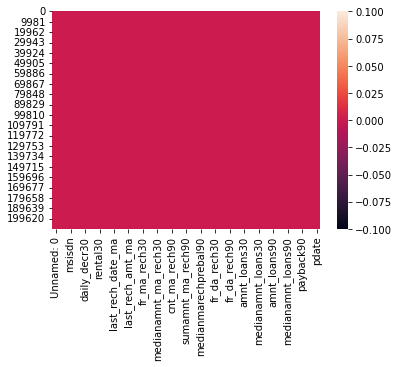

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.drop(columns=['Unnamed: 0','pcircle'],axis=1,inplace=True)

df.drop('msisdn',axis=1,inplace=True)

In [12]:
df['pmonth']=pd.to_datetime(df['pdate'],format="%Y-%m-%d").dt.month
df['pday']=pd.to_datetime(df['pdate'],format="%Y-%m-%d").dt.day
df.drop('pdate',axis=1,inplace=True)

In [13]:
df.drop(columns=['medianamnt_loans90','medianamnt_loans30','fr_da_rech90','last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90'],axis=1,inplace=True)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000
fr_ma_rech30,209593.0,3737.355121,53643.625172,0.000000,0.000,2.000000,6.00,999606.368132


In [15]:
df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
17083.998141         1
62511.750702         1
                 ...  
30346.385852         1
66821.819056         1
55716.817238         1
41580.156627         1
96927.243252         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [16]:
df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [17]:
df.drop(df[df['amnt_loans30']==0].index,inplace=True)

In [18]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
print(numerical_features)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']


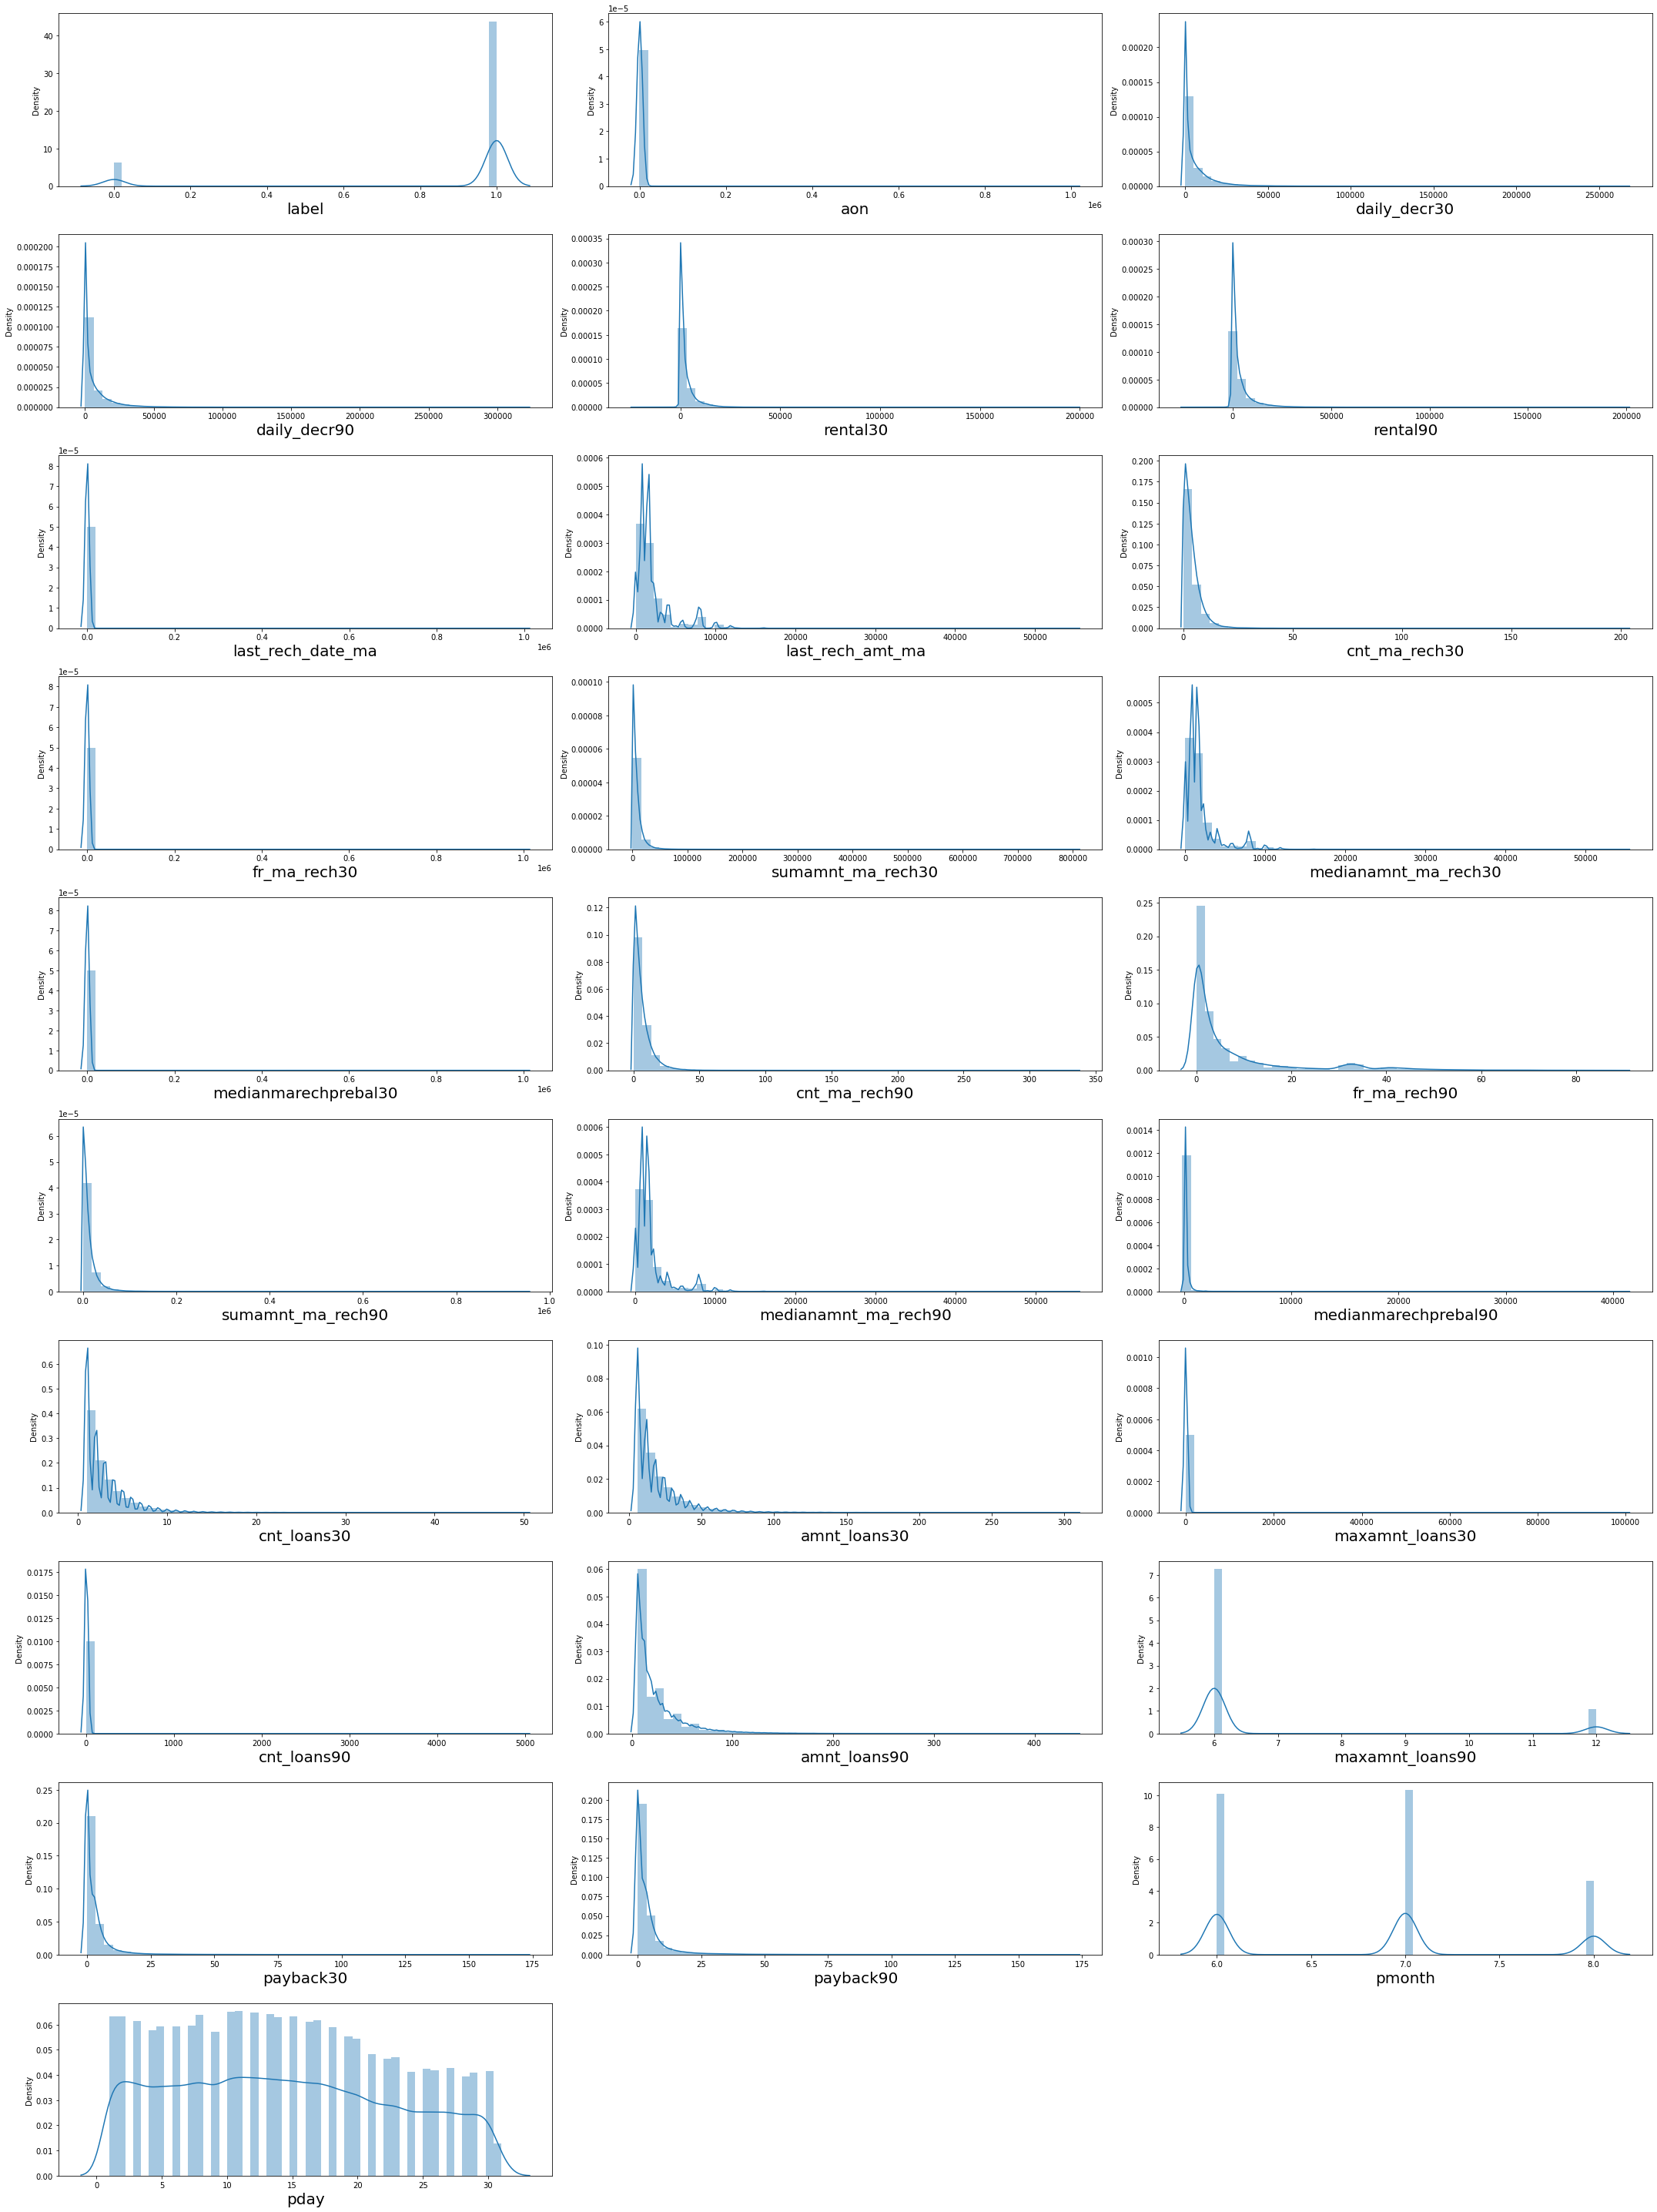

In [19]:
plt.figure(figsize=(30,40))
plotnumber=1
for column in numerical_features:
    if plotnumber <=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='label', ylabel='count'>

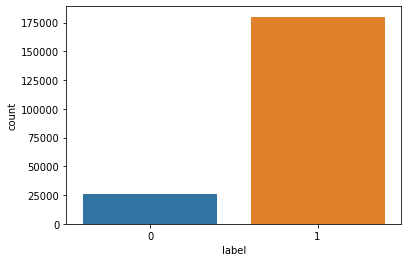

In [20]:
sns.countplot(df['label'])

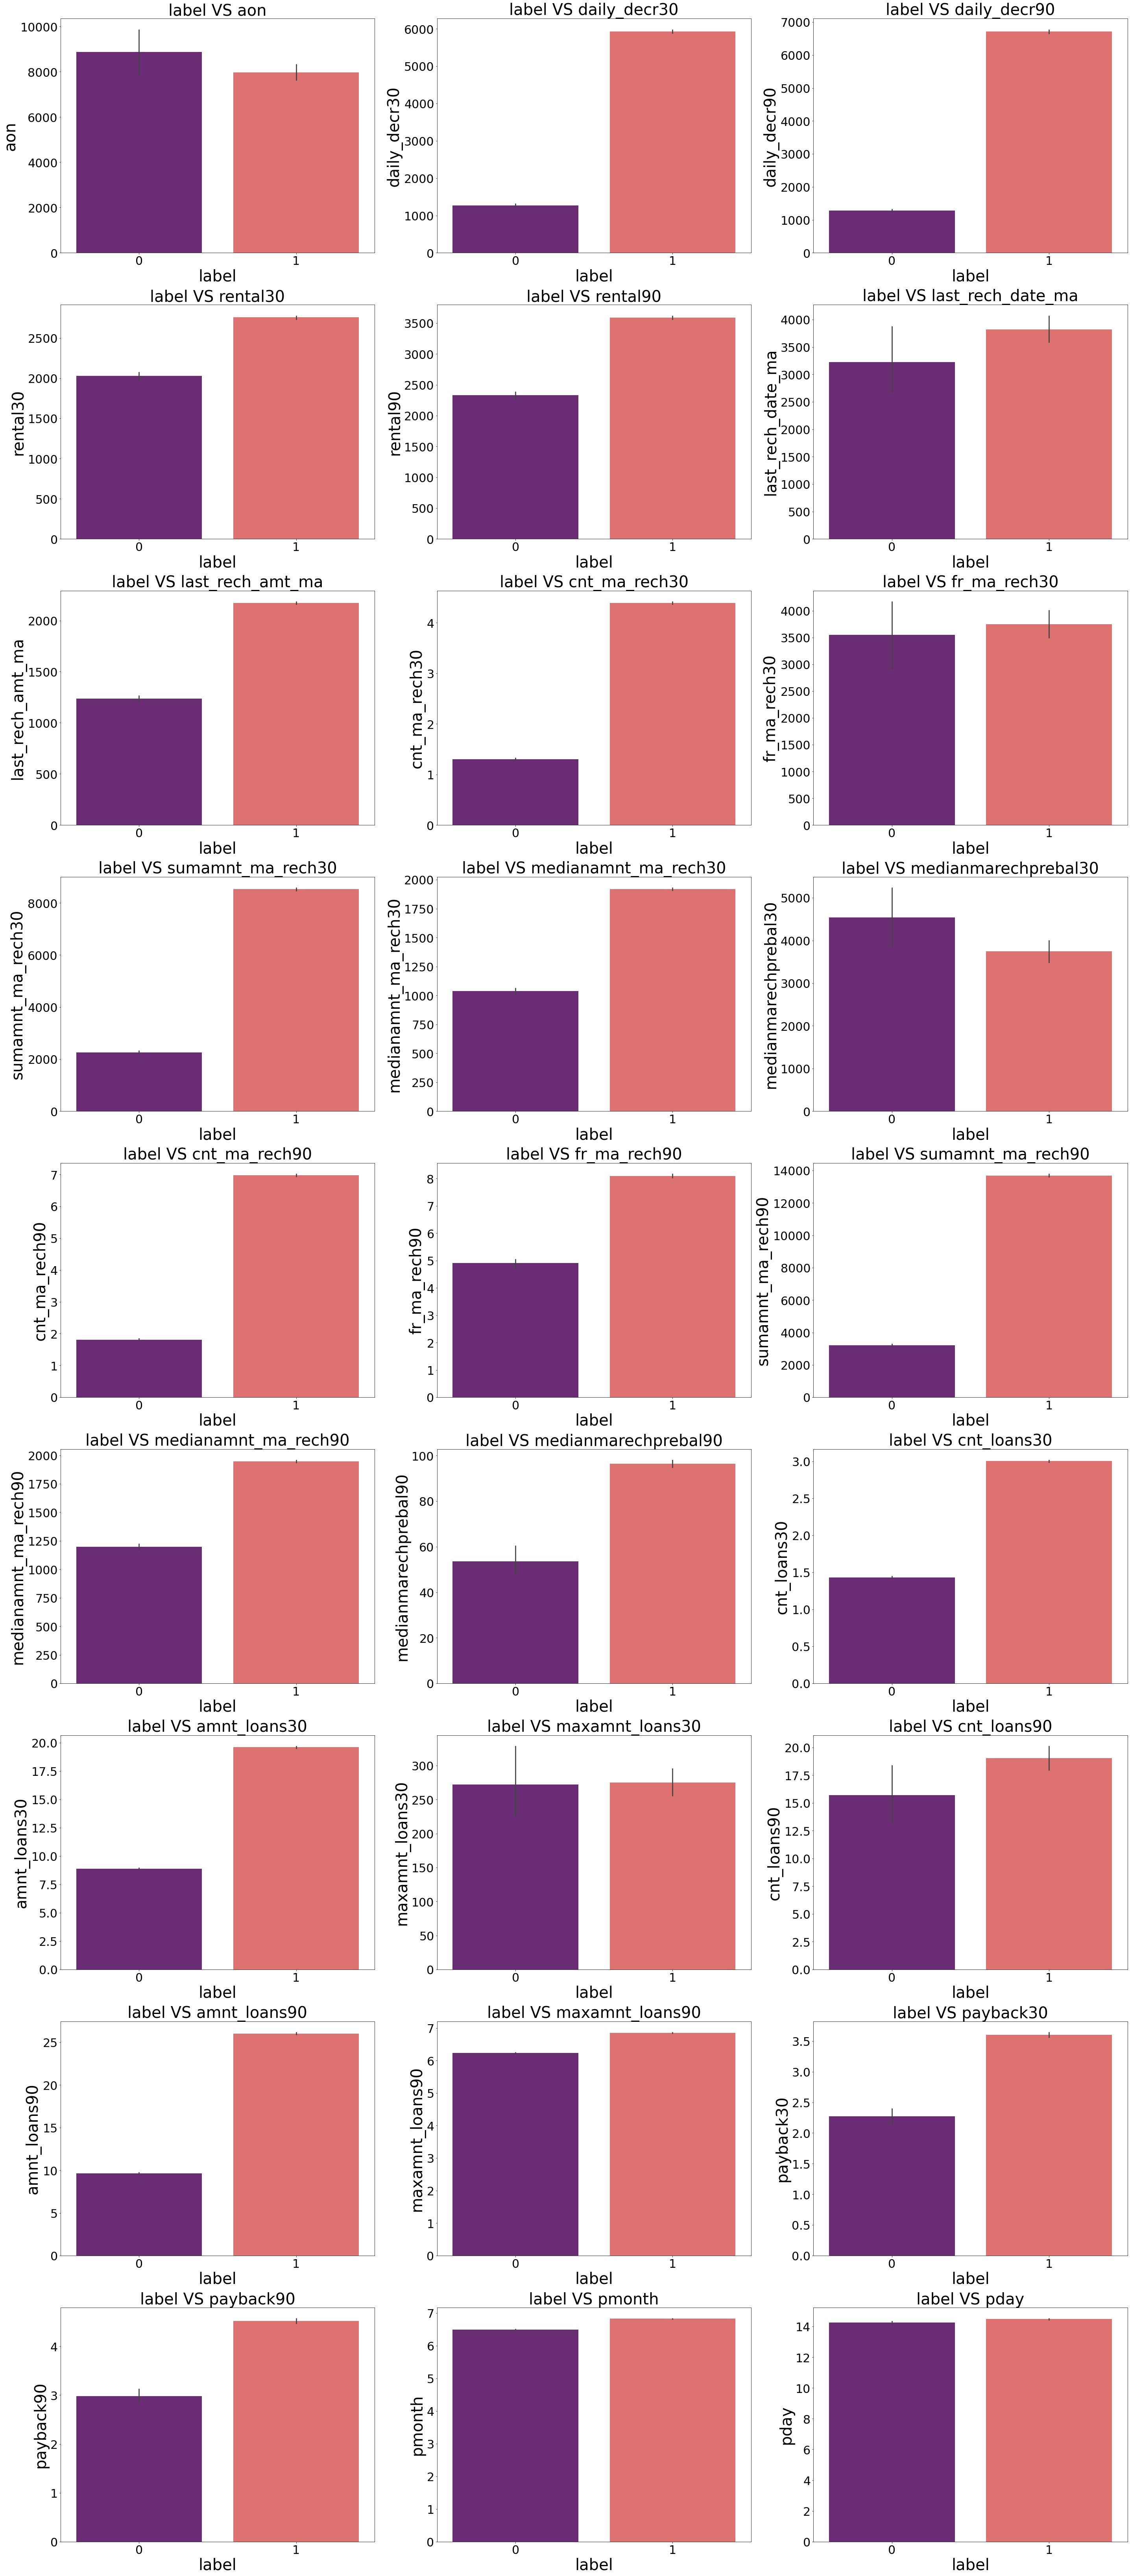

In [21]:
col=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'],y=df[col[i]],palette='magma')
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

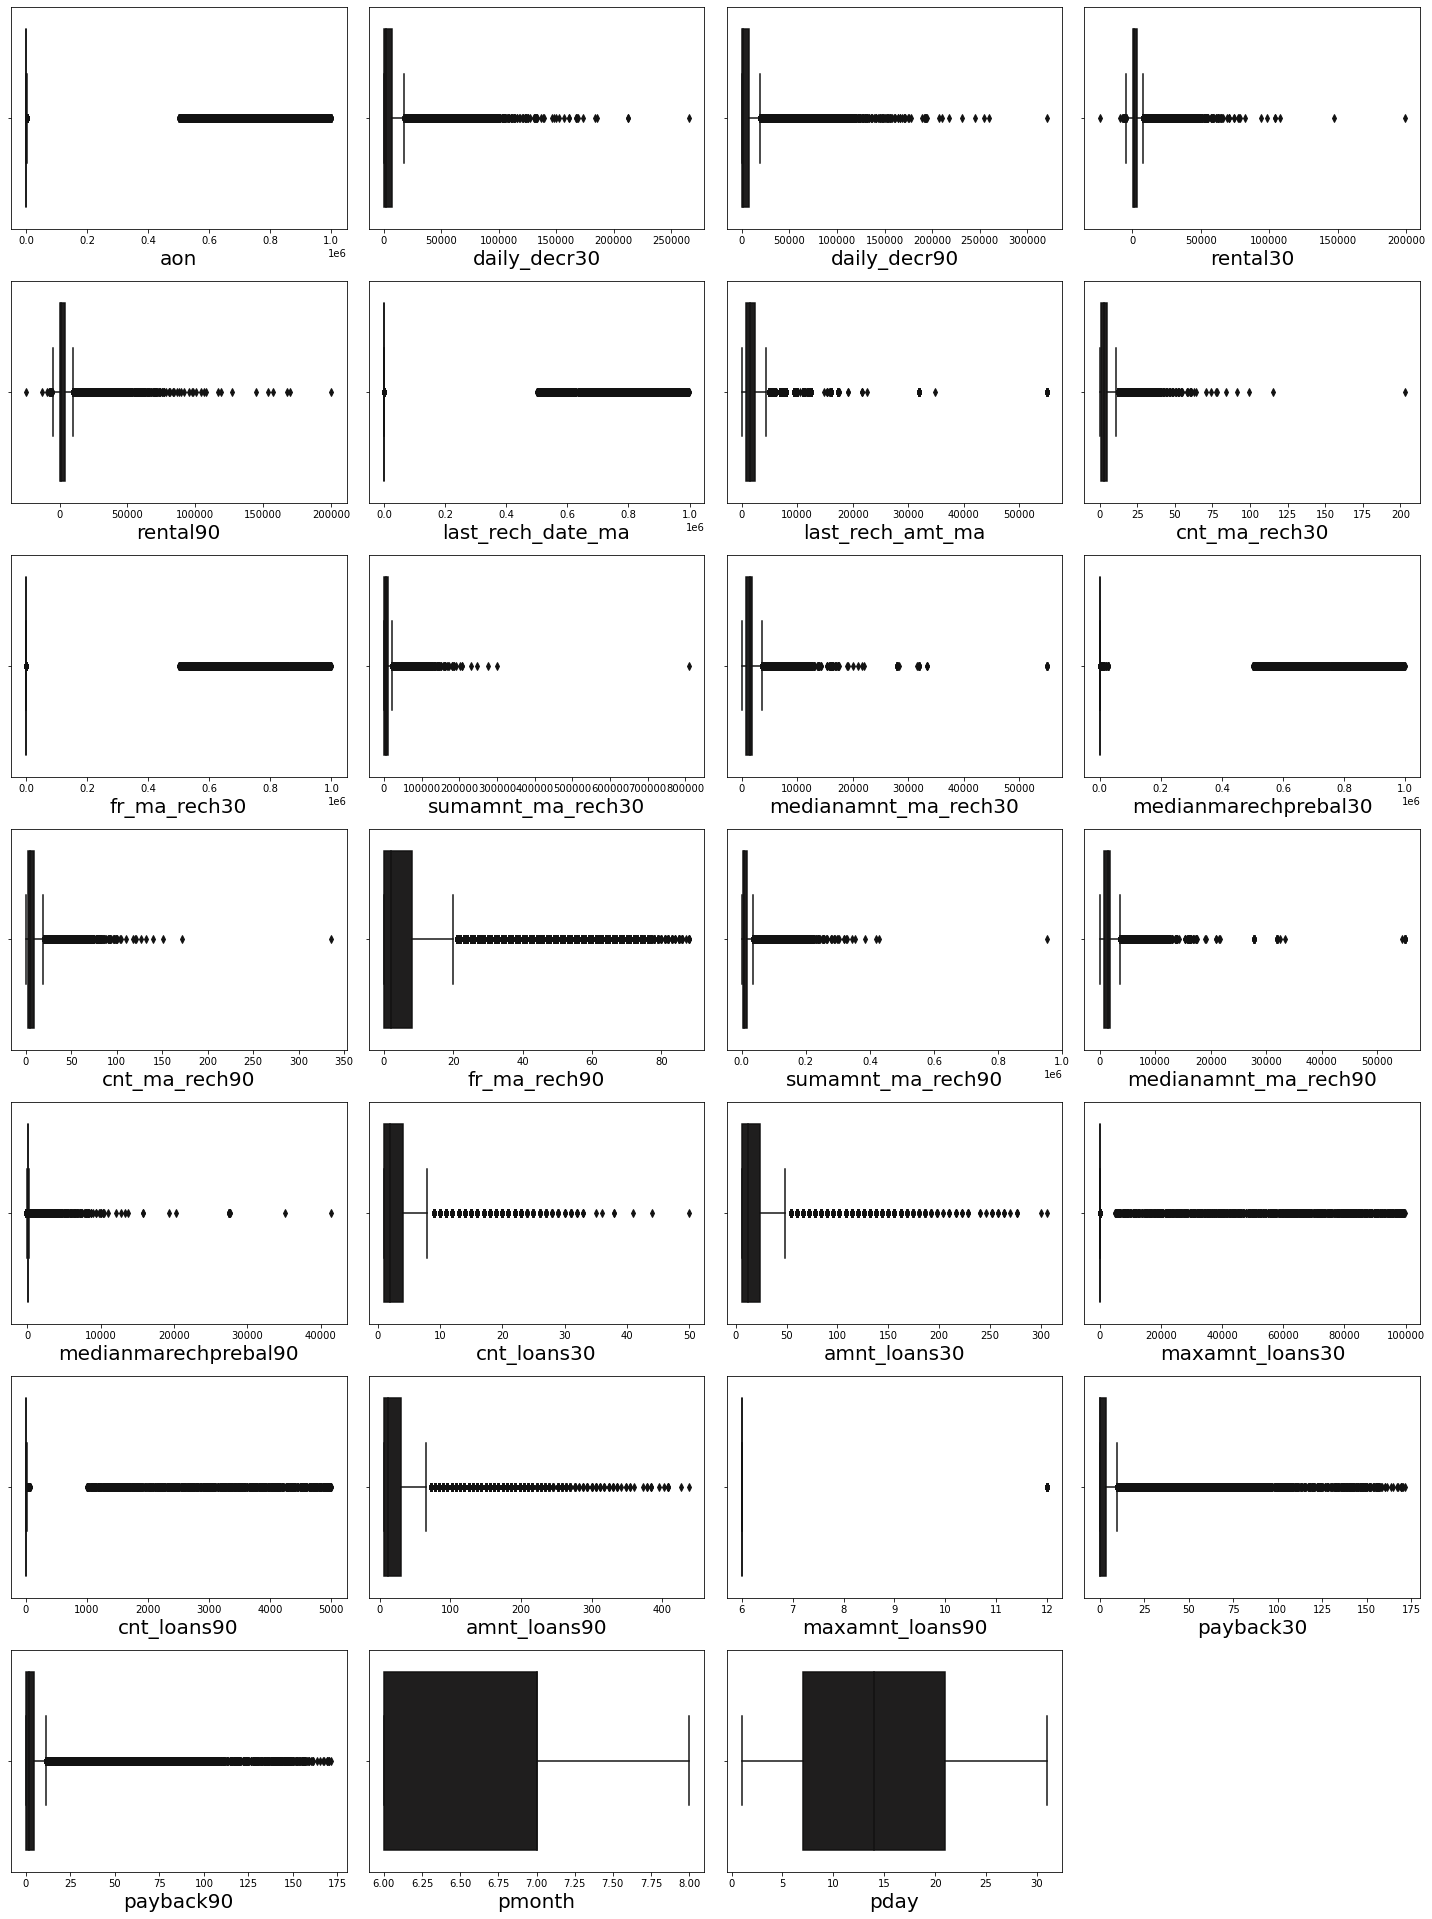

In [22]:
plt.figure(figsize=(20,30))
for i in range(len(col)):
    plt.subplot(8,4,i+1)
    sns.boxplot(df[col[i]], palette='icefire')
    plt.xlabel(col[i],fontsize =20)
    plt.tight_layout()

Text(0.5, 1.0, 'Correlation with target Variable that is label column')

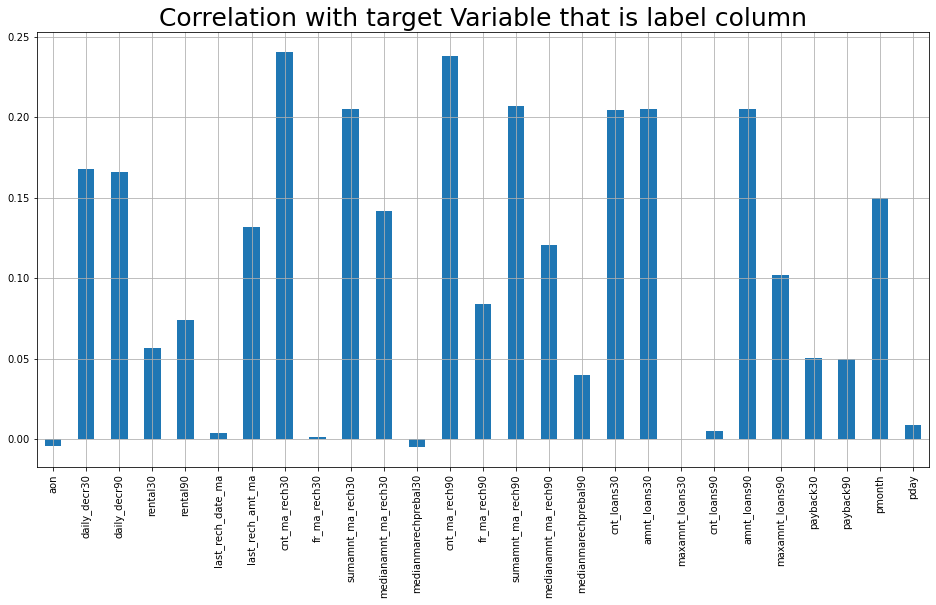

In [23]:
plt.figure(figsize=(16,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

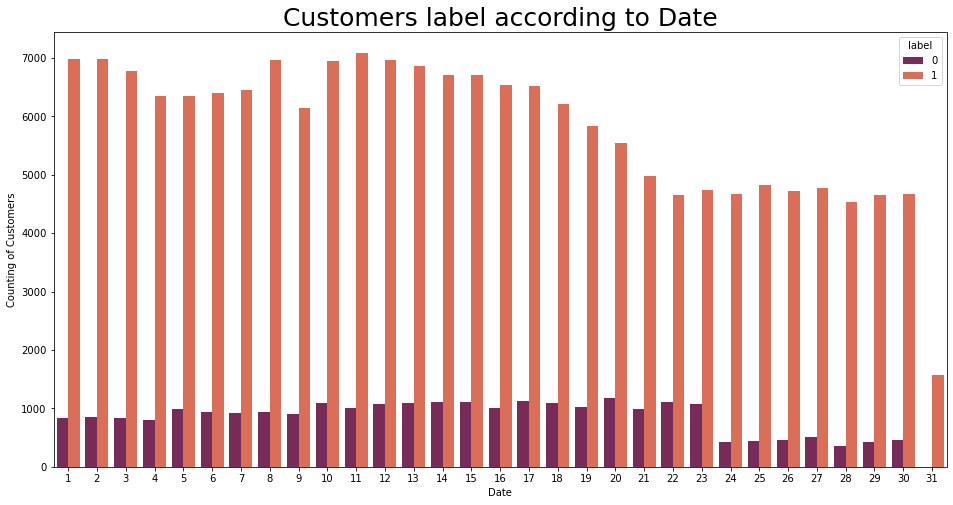

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(x="pday", hue='label', data=df, palette='rocket')
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()


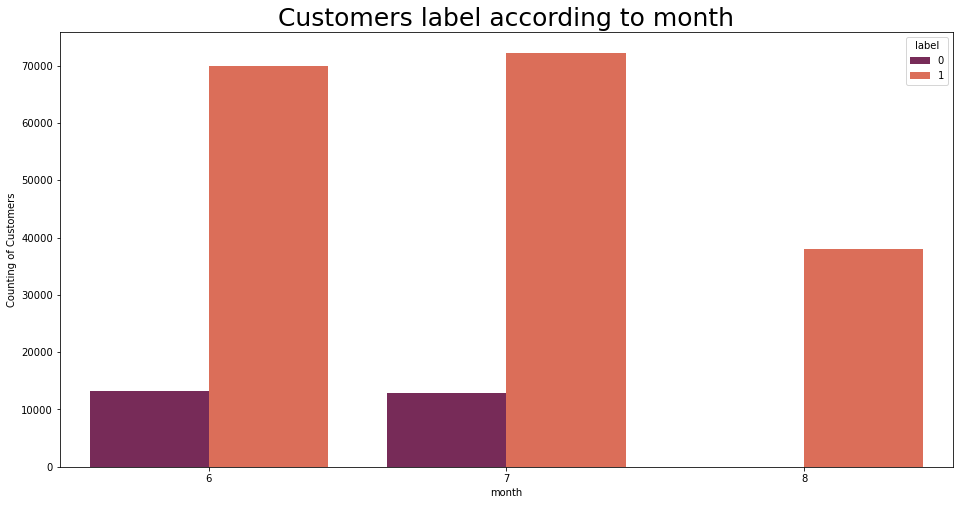

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(x="pmonth", hue='label', data=df, palette='rocket')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('month')
plt.ylabel('Counting of Customers')
plt.show()

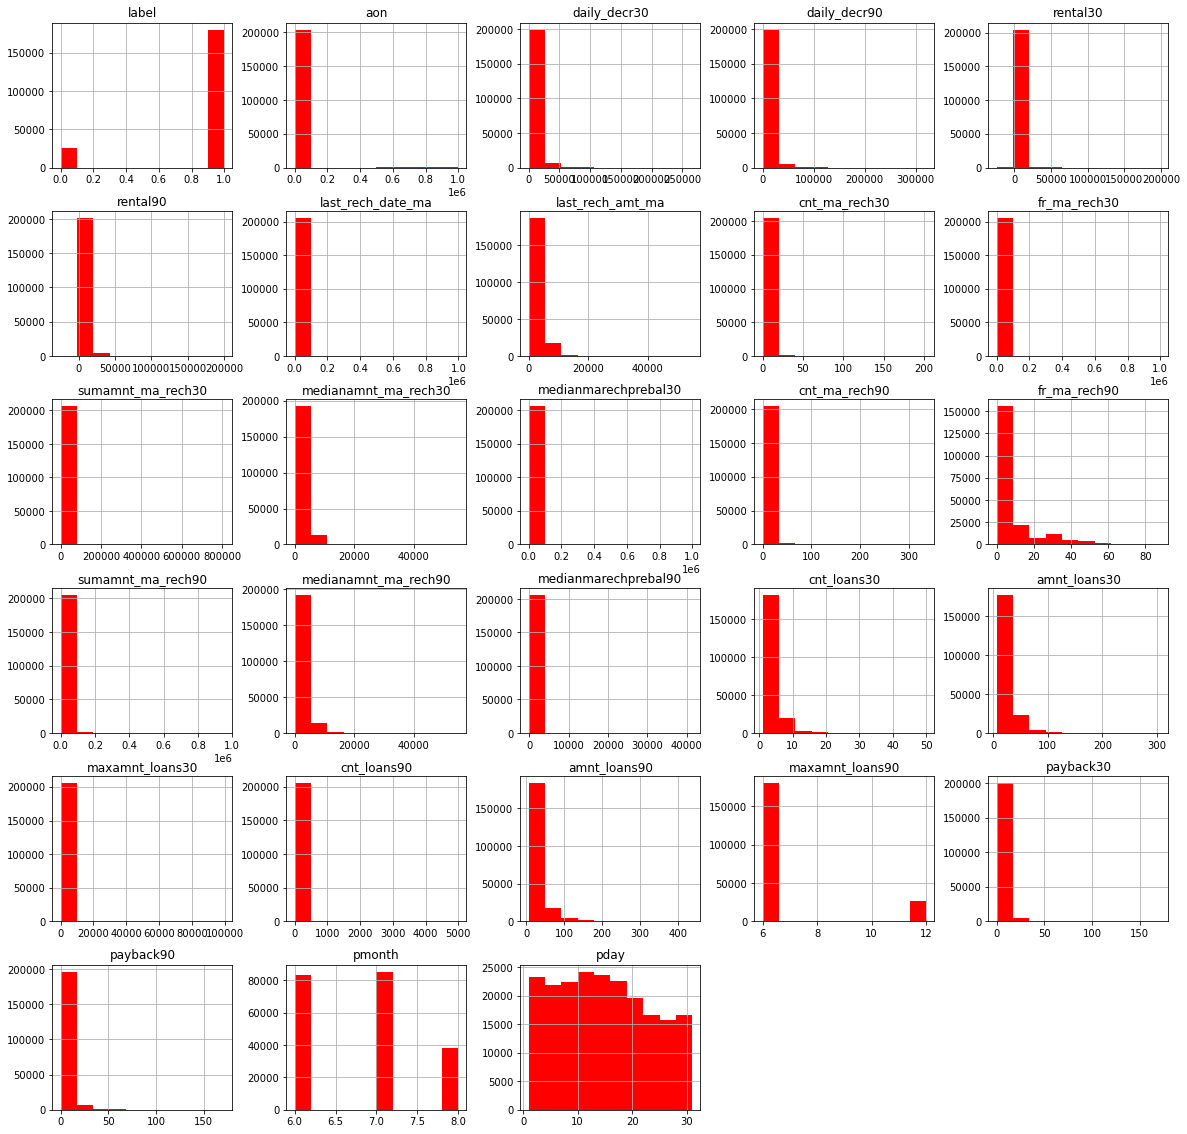

In [26]:
df.hist(figsize=(20,20),color='r')
plt.show()

In [28]:
from scipy.stats import zscore

z_score = zscore(df[['label']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,...,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000
mean,0.873206,8083.775238,5336.954688,6021.166259,2664.367446,3431.671363,3747.842543,2051.860580,4.000456,3724.804106,...,2.802558,18.235570,274.597439,18.603369,23.949897,6.772514,3.435019,4.324737,6.781485,14.448360
std,0.332743,75547.449680,9212.622214,10903.651687,4262.266027,5690.281853,53835.726141,2359.664033,4.270021,53578.005363,...,2.550769,17.368237,4240.100560,224.999624,26.547094,2.009559,8.813884,10.250851,0.734527,8.411229
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,41.300000,41.484667,276.130000,299.700000,1.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,526.000000,1389.035667,1407.000000,1070.795000,1308.900000,3.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.705882,7.000000,14.000000
75%,1.000000,981.000000,7170.000000,7671.877500,3314.222500,4136.532500,7.000000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.800000,4.500000,7.000000,21.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,...,50.000000,306.000000,99788.550177,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.000000


In [30]:
cat_df,num_df=[],[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('Total Number of Feature::', df.shape[1])
print('Number of categorical features::', len(cat_df))
print('Number of Numerical Feature::', len(num_df))

Total Number of Feature:: 28
Number of categorical features:: 0
Number of Numerical Feature:: 28


In [31]:
corr_matrix = df.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.240686
cnt_ma_rech90           0.238356
sumamnt_ma_rech90       0.206958
amnt_loans30            0.205401
amnt_loans90            0.205371
sumamnt_ma_rech30       0.205067
cnt_loans30             0.204850
daily_decr30            0.168122
daily_decr90            0.165735
pmonth                  0.149599
medianamnt_ma_rech30    0.142099
last_rech_amt_ma        0.131584
medianamnt_ma_rech90    0.120416
maxamnt_loans90         0.102042
fr_ma_rech90            0.084324
rental90                0.073810
rental30                0.056722
payback30               0.050335
payback90               0.050024
medianmarechprebal90    0.039947
pday                    0.009148
cnt_loans90             0.004911
last_rech_date_ma       0.003710
fr_ma_rech30            0.001255
maxamnt_loans30         0.000245
aon                    -0.003971
medianmarechprebal30   -0.004889
Name: label, dtype: float64

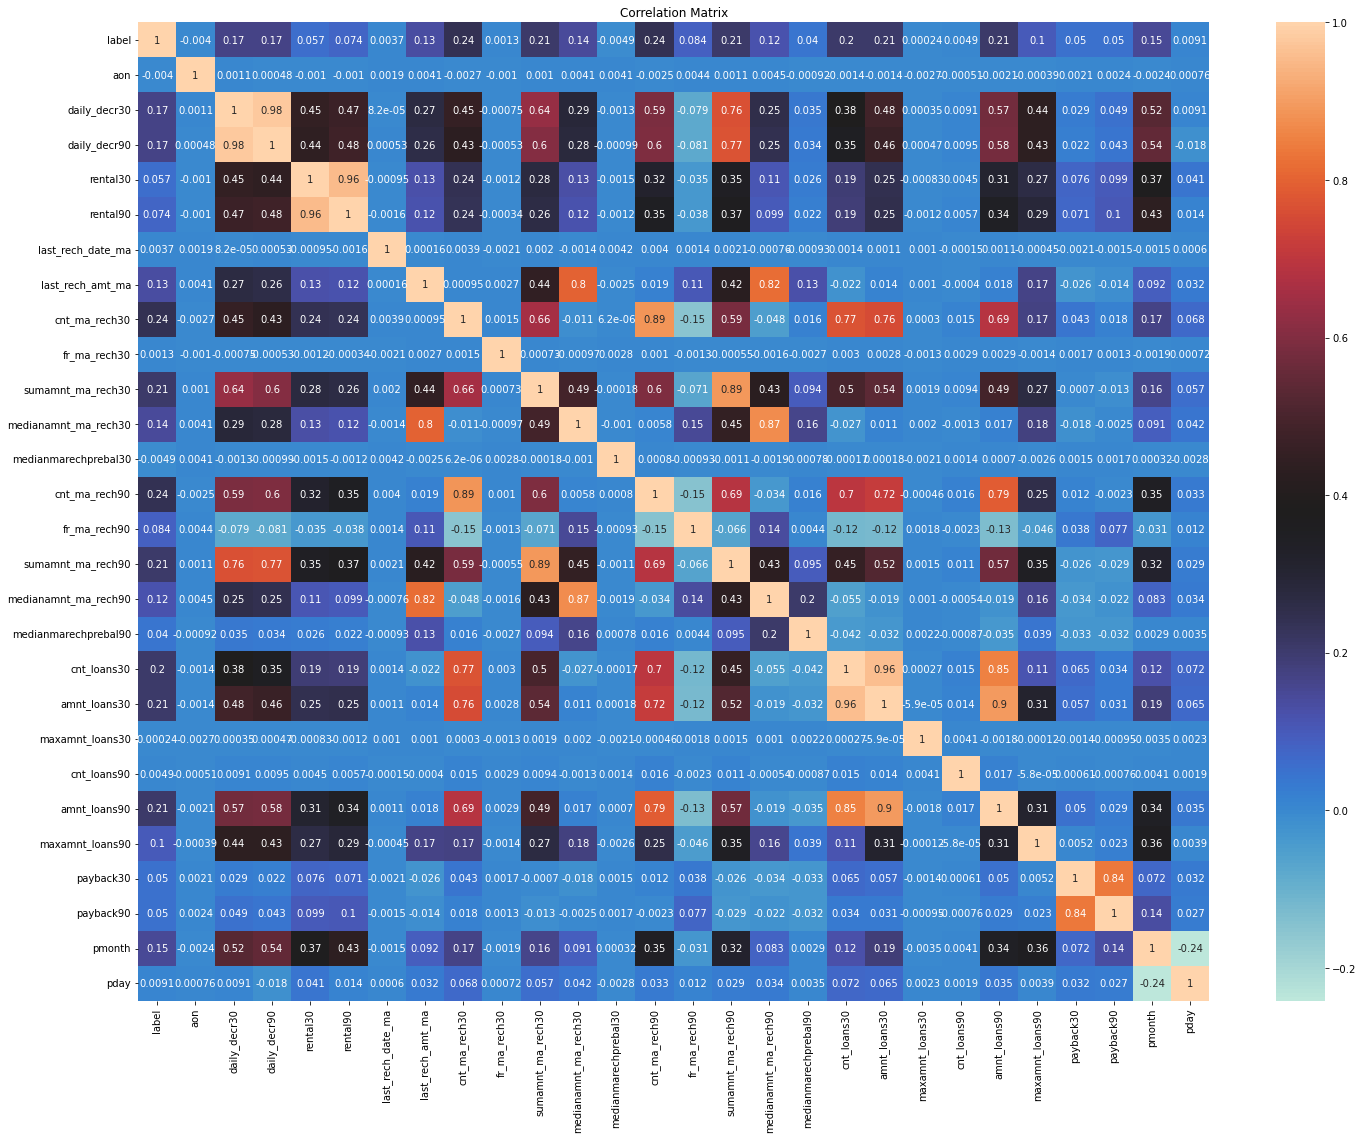

In [32]:
plt.figure(figsize=(24,18))
sns.heatmap(corr_matrix, annot=True, cmap='icefire')
plt.title("Correlation Matrix")
plt.show()

In [33]:
x = df.drop(columns = ["label"], axis=1)
y = df["label"]

x.skew()

aon                     10.412316
daily_decr30             3.965795
daily_decr90             4.284159
rental30                 4.468993
rental90                 4.379261
last_rech_date_ma       14.802413
last_rech_amt_ma         3.838389
cnt_ma_rech30            3.276838
fr_ma_rech30            14.800651
sumamnt_ma_rech30        6.402651
medianamnt_ma_rech30     3.553197
medianmarechprebal30    14.778444
cnt_ma_rech90            3.427664
fr_ma_rech90             2.290585
sumamnt_ma_rech90        4.923172
medianamnt_ma_rech90     3.799376
medianmarechprebal90    45.512392
cnt_loans30              2.737129
amnt_loans30             2.997192
maxamnt_loans30         17.648609
cnt_loans90             16.573289
amnt_loans90             3.145134
maxamnt_loans90          2.216911
payback30                8.265049
payback90                6.897933
pmonth                   0.367412
pday                     0.175518
dtype: float64

<AxesSubplot:>

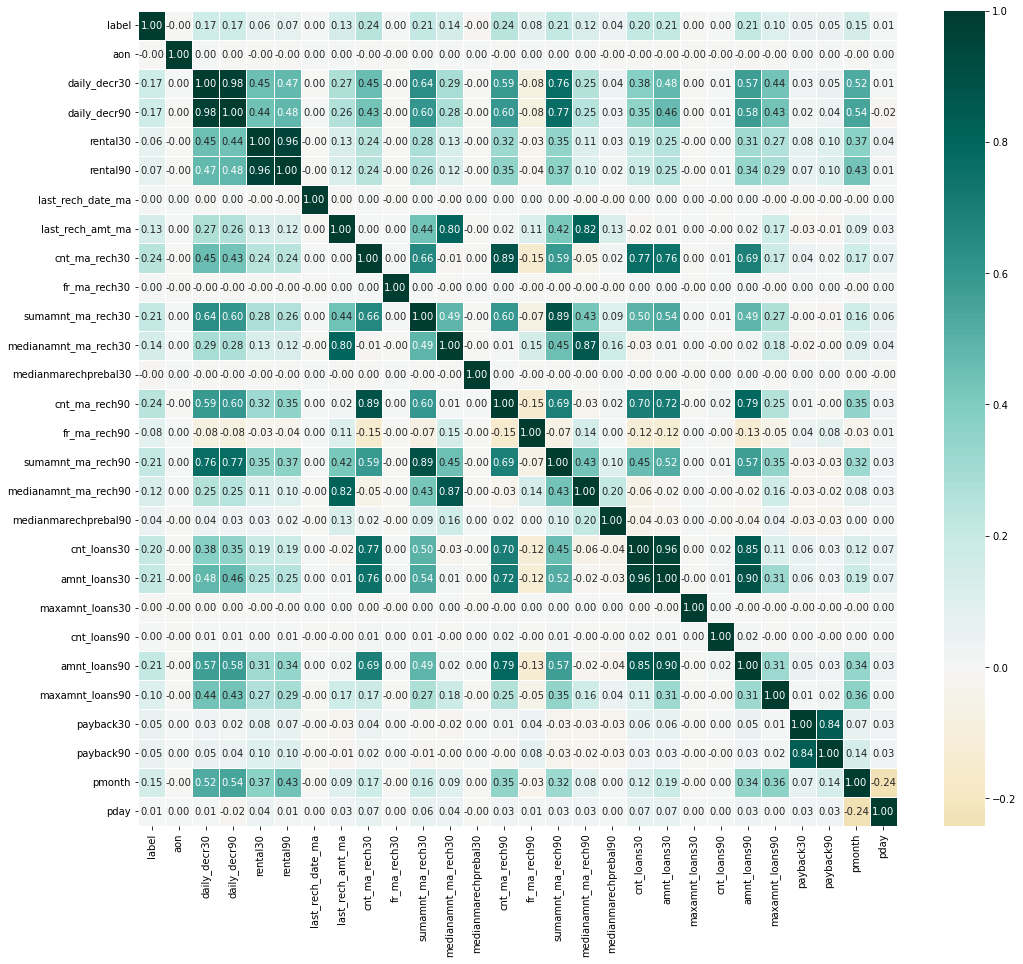

In [37]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True,cmap='BrBG',center=0,linewidth=0.5,fmt='0.2f')

[1.26794421 0.         0.         0.         0.         0.
 0.         0.         0.         8.73205579]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


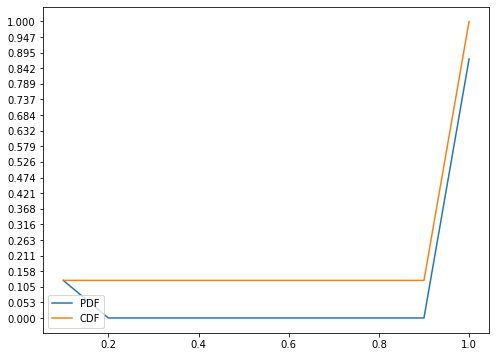

In [38]:
df_Price=df.loc[:,"label"]
count,bin_edges=np.histogram(df_Price,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")
plt.show()

In [39]:
x=df.drop('label',axis=1)
y=df['label']

y.value_counts()

1    180172
0     26162
Name: label, dtype: int64

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1 = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x1.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0.000320,0.011834,0.009847,0.107594,0.111090,0.000031,0.027982,0.009852,0.000021,0.003800,...,0.020408,0.02,0.00000,0.000200,0.013889,0.0,0.169096,0.169096,0.5,0.633333
1,0.000760,0.045918,0.038094,0.123183,0.126349,0.000049,0.105218,0.004926,0.000000,0.007144,...,0.000000,0.02,0.00006,0.000000,0.013889,1.0,0.000000,0.000000,1.0,0.300000
2,0.000583,0.005605,0.004649,0.110648,0.113936,0.000032,0.027982,0.004926,0.000000,0.001900,...,0.000000,0.00,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.600000
3,0.000289,0.000429,0.000356,0.107322,0.110642,0.000070,0.017218,0.000000,0.000000,0.000000,...,0.020408,0.02,0.00000,0.000200,0.013889,0.0,0.000000,0.000000,0.0,0.166667
4,0.000995,0.000916,0.000760,0.111541,0.114820,0.000033,0.041982,0.034483,0.000002,0.024724,...,0.122449,0.12,0.00000,0.001201,0.083333,0.0,0.013605,0.013605,0.0,0.700000


In [42]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score,roc_curve

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=42)

x_train.shape

(144433, 27)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,1.0,aon
1,38.6,daily_decr30
2,42.0,daily_decr90
3,313.0,rental30
4,310.1,rental90
5,1.0,last_rech_date_ma
6,6.0,last_rech_amt_ma
7,28.6,cnt_ma_rech30
8,1.0,fr_ma_rech30
9,20.5,sumamnt_ma_rech30


Accuracy_score of train-test

In [45]:
lg=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,shuffle=False,random_state=None)
clf=GridSearchCV(lg,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [46]:
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8746870002100128
[[  136  7669]
 [   88 54008]]
              precision    recall  f1-score   support

           0       0.61      0.02      0.03      7805
           1       0.88      1.00      0.93     54096

    accuracy                           0.87     61901
   macro avg       0.74      0.51      0.48     61901
weighted avg       0.84      0.87      0.82     61901

